In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
d1 = d3 = 1/(2 - 2**(1/3))
d2 = -2**(1/3)*d1
d4 = 0
c1 = c4 = d1/2
c2 = c3 = (1 - 2**(1/3))*c1

cs = [c1, c2, c3, c4]
ds = [d1, d2, d3, d4]
sum(cs), sum(ds)

(1.0, 1.0)

In [43]:
def dT_dp(p):
    return p

def dV_dq(q):
    return 2*np.cos(q)*np.sin(q)

def hamiltonian(q, p):
    return p**2/2 - np.cos(q)**2

In [44]:
z = [(0.5, 0)]
z_rk = [z[0]]
dt = 0.1
for i in range(1000):
    q, p = z[-1]
    for c, d in zip(cs, ds):
        qi = q + dt*c*dT_dp(p)
        pi = p - dt*d*dV_dq(q)
        q, p = qi, pi
    z.append((q, p))

    q, p = z_rk[-1]

    k1 = dT_dp(p)
    k2 = dT_dp(p + dt*k1/2)
    k3 = dT_dp(p + dt*k2/2)
    k4 = dT_dp(p + dt*k3)

    l1 = -dV_dq(q)
    l2 = -dV_dq(q + dt*l1/2)
    l3 = -dV_dq(q + dt*l2/2)
    l4 = -dV_dq(q + dt*l3)

    z_rk.append((
        q + dt*(k1 + 2*k2 + 2*k3 + k4)/6,
        p + dt*(l1 + 2*l2 + 2*l3 + l4)/6
    ))

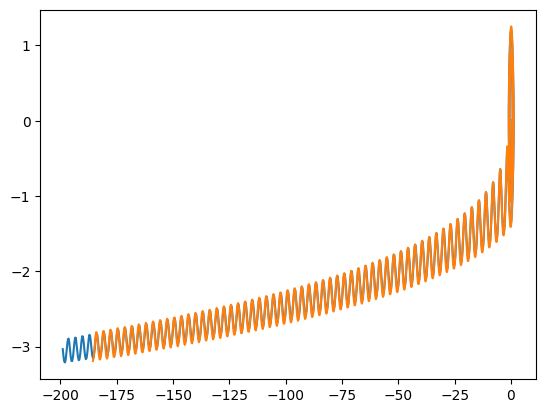

In [45]:
plt.plot(*np.transpose(z_rk))
plt.plot(*np.transpose(z))

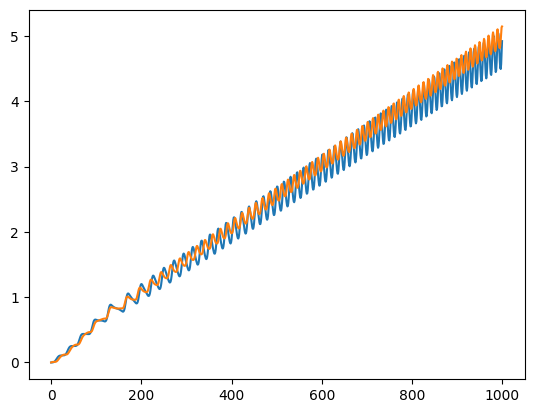

In [46]:
plt.plot([abs(hamiltonian(q, p) - hamiltonian(*z[0])) for q, p in z])
plt.plot([abs(hamiltonian(q, p) - hamiltonian(*z[0])) for q, p in z_rk])